In [1]:
import modules.latent_space_mapping
import modules.restore_networks
from os.path import split
import resources.sinusoidal
import numpy as np
# Matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import win32api
%matplotlib inline

This notebook performs the mapping between the embeddings in $\mathbb{R}^2$ of the sinusoidal signals for N, H, and HK.

## Encoded Data

These are the latent representations $\mathcal{Z} = \{z_{i}\}_{i=1}^N$ obtained from the data set $\mathcal{X} = \{x_{i}\}_{i=1}^N$. Each data point is given in terms of the partition of the interval $[0, 2\pi]$. Each encoding depends on the distribution $q$ chosen for the encoder of the VAE. The variational autoencoders that produced the embeddings have already been trained separately.

In [2]:
normal_code = np.load('normal_encoding.npy')
hk_code = np.load('hk_encoding.npy')

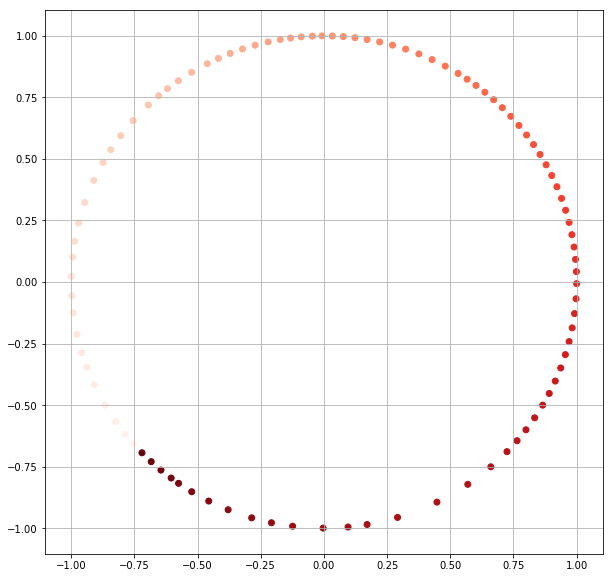

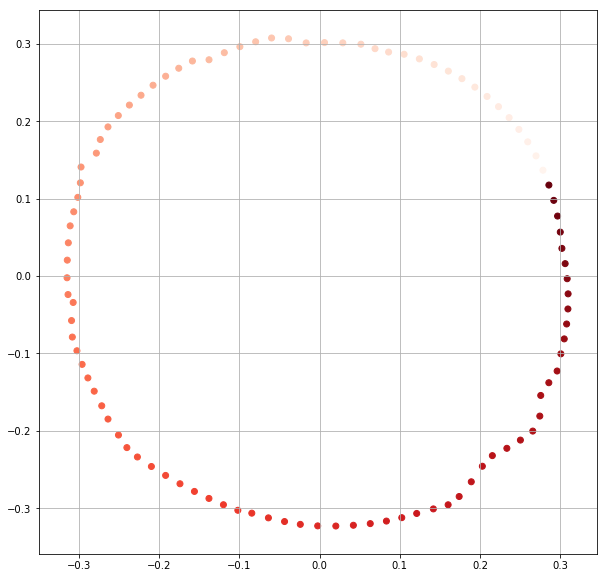

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(hk_code[:,0], hk_code[:,1], c = range(len(hk_code)), cmap = 'Reds')
plt.grid()
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(normal_code[:,0], normal_code[:,1], c = range(len(hk_code)), cmap = 'Reds')
plt.grid()
plt.show()

## Previously trained models

We enlist the models trained previously and saved in a specific path. The dataframe shows the weights for each of the experiments

In [51]:
PATH = "C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models"
df = modules.restore_networks.dataframe_graphs_in_folder(PATH)

C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models
['CommutativeSinusoid', 'DecoderSavingTest', 'HKencoding', 'HumanDecoder', 'JoiningTest', 'NormalDecoder', 'TestingSaving', 'TFvaeHK']
             Experiment                                          Filenames
0   CommutativeSinusoid      HumanDecoder2018-05-07-15-23_Phases.ckpt.meta
1   CommutativeSinusoid   JoiningTest2018-05-03-11-19_HeatKernel.ckpt.meta
2   CommutativeSinusoid       JoiningTest2018-05-03-11-24_Normal.ckpt.meta
3     DecoderSavingTest  DecoderSavingTest2018-05-04-14-11_Normal.ckpt....
4     DecoderSavingTest  DecoderSavingTest2018-05-04-14-11_Normal_decod...
5            HKencoding    HKencoding2018-05-04-16-59_HeatKernel.ckpt.meta
6            HKencoding  HKencoding2018-05-04-16-59_HeatKernel_decoder....
7          HumanDecoder      HumanDecoder2018-05-07-13-19_Phases.ckpt.meta
8          HumanDecoder      HumanDecoder2018-05-07-15-23_Phases.ckpt.meta
9           JoiningTest   JoiningTe

In [52]:
# Creates a dictionary with the variable values of two saved models in a given path 
model1 = 2
model2 = 1
dictionary_variables = modules.restore_networks.join_two_experiments(PATH, df, model1, model2)

C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models\CommutativeSinusoid\weights\JoiningTest2018-05-03-11-24_Normal.ckpt.meta restored

C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models\CommutativeSinusoid\weights\JoiningTest2018-05-03-11-19_HeatKernel.ckpt.meta restored



In [53]:
# Define the decoder architecture for the mapping of latent spaces
names = ['HeatKernel', 'Normal', 'Human']
order = (1,0) #Tuple with the mapping order
data_dimensions = 50 
learning_rate = 0.0001
vae = modules.latent_space_mapping.vae_nn_mapping(learning_rate, order, data_dimensions)

Mapping from Normal to HeatKernel


In [54]:
# Join and recover two models
name = "normal_hk.cpkt"
time_str = time.strftime("%Y-%m-%d-%H-%M_")
JOINED_MODEL_PATH = PATH+'\\joined_models\\'+name
DIR_TENSORBOARD = PATH+'\\joined_models\\tensorboard\\'+name+time_str
# Create weight file with joined networks
vae.assign_values(dictionary_variables, JOINED_MODEL_PATH)

Loading the weight of the variables ...
Loading the variable decoder_Normal/h_dec_Normal/kernel:0...

Loading the variable decoder_Normal/h_dec_Normal/bias:0...

Loading the variable decoder_Normal/h_dec2_Normal/kernel:0...

Loading the variable decoder_Normal/h_dec2_Normal/bias:0...

Loading the variable decoder_Normal/x_r_Normal/kernel:0...

Loading the variable decoder_Normal/x_r_Normal/bias:0...

Loading the variable decoder_HeatKernel/h_dec_HeatKernel/kernel:0...

Loading the variable decoder_HeatKernel/h_dec_HeatKernel/bias:0...

Loading the variable decoder_HeatKernel/h_dec2_HeatKernel/kernel:0...

Loading the variable decoder_HeatKernel/h_dec2_HeatKernel/bias:0...

Loading the variable decoder_HeatKernel/x_r_HeatKernel/kernel:0...

Loading the variable decoder_HeatKernel/x_r_HeatKernel/bias:0...

Finished loading variables.


In [55]:
vae.train(1000, epochs = 100000, log_dir_tensorboard=DIR_TENSORBOARD, weights_folder=JOINED_MODEL_PATH)

Restoring saved parameters
Epoch 0 | Loss: 2.92E+02 
Epoch 1 | Loss: 2.96E+02 
Epoch 2 | Loss: 2.90E+02 
Epoch 3 | Loss: 2.96E+02 
Epoch 4 | Loss: 3.01E+02 
Epoch 5 | Loss: 2.90E+02 
Epoch 6 | Loss: 2.84E+02 
Epoch 7 | Loss: 3.06E+02 
Epoch 8 | Loss: 3.07E+02 
Epoch 9 | Loss: 2.93E+02 
Epoch 10 | Loss: 2.93E+02 
Epoch 11 | Loss: 2.92E+02 
Epoch 12 | Loss: 2.89E+02 
Epoch 13 | Loss: 3.02E+02 
Epoch 14 | Loss: 2.99E+02 
Epoch 15 | Loss: 2.89E+02 
Epoch 16 | Loss: 2.91E+02 
Epoch 17 | Loss: 2.94E+02 
Epoch 18 | Loss: 2.92E+02 
Epoch 19 | Loss: 2.97E+02 
Epoch 20 | Loss: 3.02E+02 
Epoch 21 | Loss: 3.14E+02 
Epoch 22 | Loss: 2.94E+02 
Epoch 23 | Loss: 3.02E+02 
Epoch 24 | Loss: 2.87E+02 
Epoch 25 | Loss: 2.96E+02 
Epoch 26 | Loss: 2.92E+02 
Epoch 27 | Loss: 3.06E+02 
Epoch 28 | Loss: 3.05E+02 
Epoch 29 | Loss: 3.03E+02 
Epoch 30 | Loss: 3.02E+02 
Epoch 31 | Loss: 2.97E+02 
Epoch 32 | Loss: 3.00E+02 
Epoch 33 | Loss: 2.81E+02 
Epoch 34 | Loss: 2.91E+02 
Epoch 35 | Loss: 2.86E+02 
Epoch 36 | 

In [56]:
win32api.GetShortPathName(DIR_TENSORBOARD)

'C:\\Users\\LUISPR~1\\DOCUME~1\\Master\\TUE\\FINALP~1\\TENSOR~1\\JOINED~1\\TENSOR~1\\NORMAL~2.CPK'

In [57]:
samples, mapped_samples = vae.map_latent_space(1000, weights_folder=JOINED_MODEL_PATH)
decoded1, decoded2 = vae.decode_codes(samples, weights_folder=JOINED_MODEL_PATH)

In [58]:
win32api.GetShortPathName("C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models\\joined_models\\tensorboard")

'C:\\Users\\LUISPR~1\\DOCUME~1\\Master\\TUE\\FINALP~1\\TENSOR~1\\JOINED~1\\TENSOR~1'

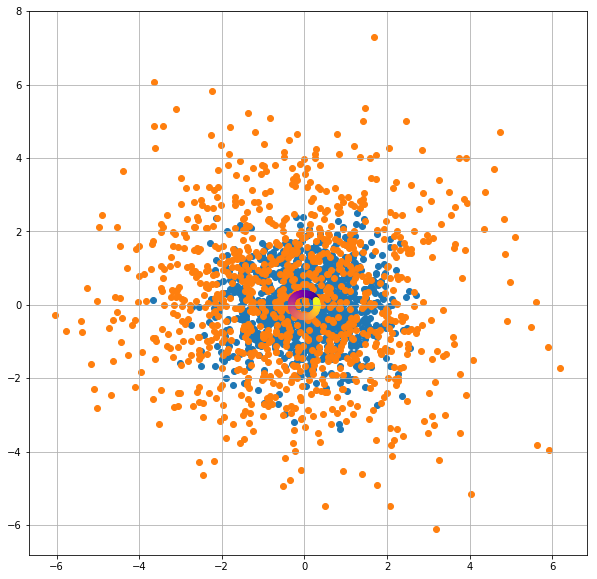

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(samples[:,0], samples[:,1])
plt.scatter(mapped_samples[:,0], mapped_samples[:,1])
# plt.scatter(original_normal[:,0], original_normal[:,1],c = np.arange(len(original_normal)), cmap = cm.bone)
plt.scatter(normal_code[:,0], normal_code[:,1],c = np.arange(len(hk_code)), cmap = cm.plasma)
plt.grid()

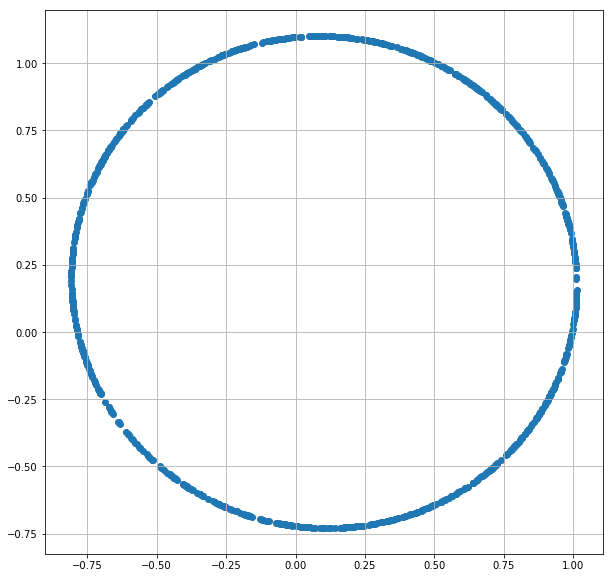

In [115]:
plt.figure(figsize=(10,10))
plt.scatter(mapped_samples[:,0], mapped_samples[:,1])
plt.grid()

In [60]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np; np.random.seed(42)
%matplotlib qt5
# Generate data x, y for scatter and an array of images.
def plot_latent_space_mapping(input_latent_code, output_latent_code, input_decoded, output_decoded):
    x = input_latent_code[:,0]
    y = input_latent_code[:,1]

    # Create figure 
    fig = plt.figure(figsize=(20,10))
    # Create input latent map
    ax = plt.subplot(121)
    line, = ax.plot(x,y, ls="", marker="o")
    ax.grid()
    ax.set_aspect(1)
    # Create output latent map
    ax2 = plt.subplot(122)
    ax2.grid()
    ax2.set_aspect(1)
    line2, = ax2.plot(output_latent_code[:,0], output_latent_code[:,1], ls = "", marker = "o", alpha = 0.25)
    # Create the reconstruction subaxes
    subax = plt.axes([0.65, 0.65, 0.2, 0.2])
    subax.set_visible(False)
    subax2 = plt.axes([0.65, 0.60, 0.2, 0.2])
    subax2.set_visible(False)

    def hover(event):
        # if the mouse is over the scatter points
        if line.contains(event)[0]:
            # find out the index within the array from the event
            ind, = line.contains(event)[1]["ind"]
            # get the figure size
            w,h = fig.get_size_inches()*fig.dpi
            w_inch, h_inch = fig.get_size_inches()
            ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
            hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
            # if event occurs in the top or right quadrant of the figure,
            # change the annotation box position relative to mouse.
    #         subax.xybox = (xybox[0]*ws, xybox[1]*hs)
            # make annotation box visible

            # Show the data reconstruction from input space
            subax.clear()
            figure_coord = fig.transFigure.inverted().transform((event.x,event.y))
            subax.set_position([figure_coord[0], figure_coord[1], 0.2, 0.2])
            subax.plot(range(50), decoded1[ind],'b')
            subax.set_xticks([])
            subax.set_yticks([])
            subax.set_visible(True)
            # Show the data reconstruction from output space
            subax2.clear()
            display_ax2 = ax2.transData.transform((samples[ind,0], samples[ind,1]))
            figure_ax2 = fig.transFigure.inverted().transform(display_ax2)
            subax2.set_position([figure_ax2[0], figure_ax2[1], 0.2, 0.2])
            subax2.plot(range(50), decoded2[ind], 'b')
            subax2.set_xticks([])
            subax2.set_yticks([])
            subax2.set_visible(True)
            ax2.plot(samples[ind,0], samples[ind, 1], ls = "", markersize = 10, markeredgewidth = 1.5, marker = "o", markeredgecolor = "k", markerfacecolor='w', color = "r")
        else:
            ax2.clear()
            ax2.grid()
            ax2.plot(samples[:,0], samples[:,1], ls = "", marker = "o", alpha = 0.25)
            #if the mouse is not over a scatter point
            subax2.set_visible(False)
            subax.set_visible(False)
        fig.canvas.draw_idle()
    # add callback for mouse moves
    fig.canvas.mpl_connect('motion_notify_event', hover)           
    plt.show()

In [ ]:
plot_latent_space_mapping(samples, mapped_samples, decoded1, decoded2)

ax.